<a href="https://colab.research.google.com/github/FemiAdesola/Data-Science/blob/main/Sales_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ins>**UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE**


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction
  </td></tr>
</table>


# <ins>**SALE DEPARTMENT**
+ For companies to become competitive and skyrocket their growth, they need to leverage Al/ML to develop predictive models to forecast sales in the future.
- Predictive models attempt at forecasting future sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competition.
+ In this project, you workas a data scientist in the sales department and the sales team provided you with data from <ins>**1115**</ins> stores.
+  The objective is to predict future daily sales based on the features.


![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

## **The Key features in sales department**

- **Id**: transactionID (combination of Storeand date)
+ **Store**: unique storeld
+ **Sales**: sales/ day, this is the target variable
+ **Customers**: number of customers on a given day
+ **Open**: Boolean to say whether a store is open or
closed (0 = closed, 1 = open)
+ **Promo**: describes if store is running a promo on that day or not
+ **StateHoliday**: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, O = None)
+ **SchoolHoliday**: indicates if the (Store, Date) was affected by the closure of public schools
+ **StoreType**: categorical variable to indicate type of store (a, b, c, d)
+ **Assortment**: a = basic, b = extra, c = extended
+ **CompetitionDistance (meters)**: distance to closest competitor store
+ **CompetitionOpenSince [Month/Year]**: date when competition was open
+ **Promo2**: Promo2 is a continuing and consecutive promotion for some stores (0 = storeis not participating, 1 = storeis participating)
+ **Promo2Since [Year/Week]**: date when store started participating in Promo2
+ **Promolnterval**: describes the consecutive intervals Promo2 is started, naming the months promotion is started anew. E.g. "Feb,May,Aug, Nov" meanseach round starts in February, May, August, Novemberof any given year for that store


 Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

#  <ins>**IMPORT LIBRARIES AND DATASET**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# You will need to mount your drive using the following commands:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2.1:  <ins>**IMPORT SALES TRAINING DATA**

In [3]:
# To include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv', low_memory=False)

In [4]:
sales_train_df.head(5)
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


 + 9 columns in total
+ 8 features, each contains 1017209 data points
+ 1 target variable (sales)

In [7]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


- Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
+ Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

#2.2:  <ins>**IMPORT STORE INFORMATION DATA**

In [8]:
store_info_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/store.csv')

In [9]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**The store_info_df data**
+ The previous dataframe includes the transactions recorded per day (in millions)
+ This dataframe only includes information about the unique 1115 stores that are part of this study

In [11]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Averagely, the competition distance is 5404 meters away (5.4 kms)

#  <ins>**EXPLORE DATASET**

#3.1:  <ins>**EXPLORE SALES TRAINING DATA**

<Axes: >

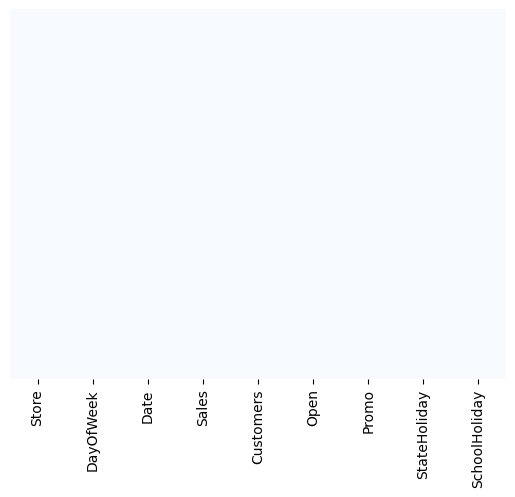

In [12]:
# For checking missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**Note**: No missing data in sale data

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

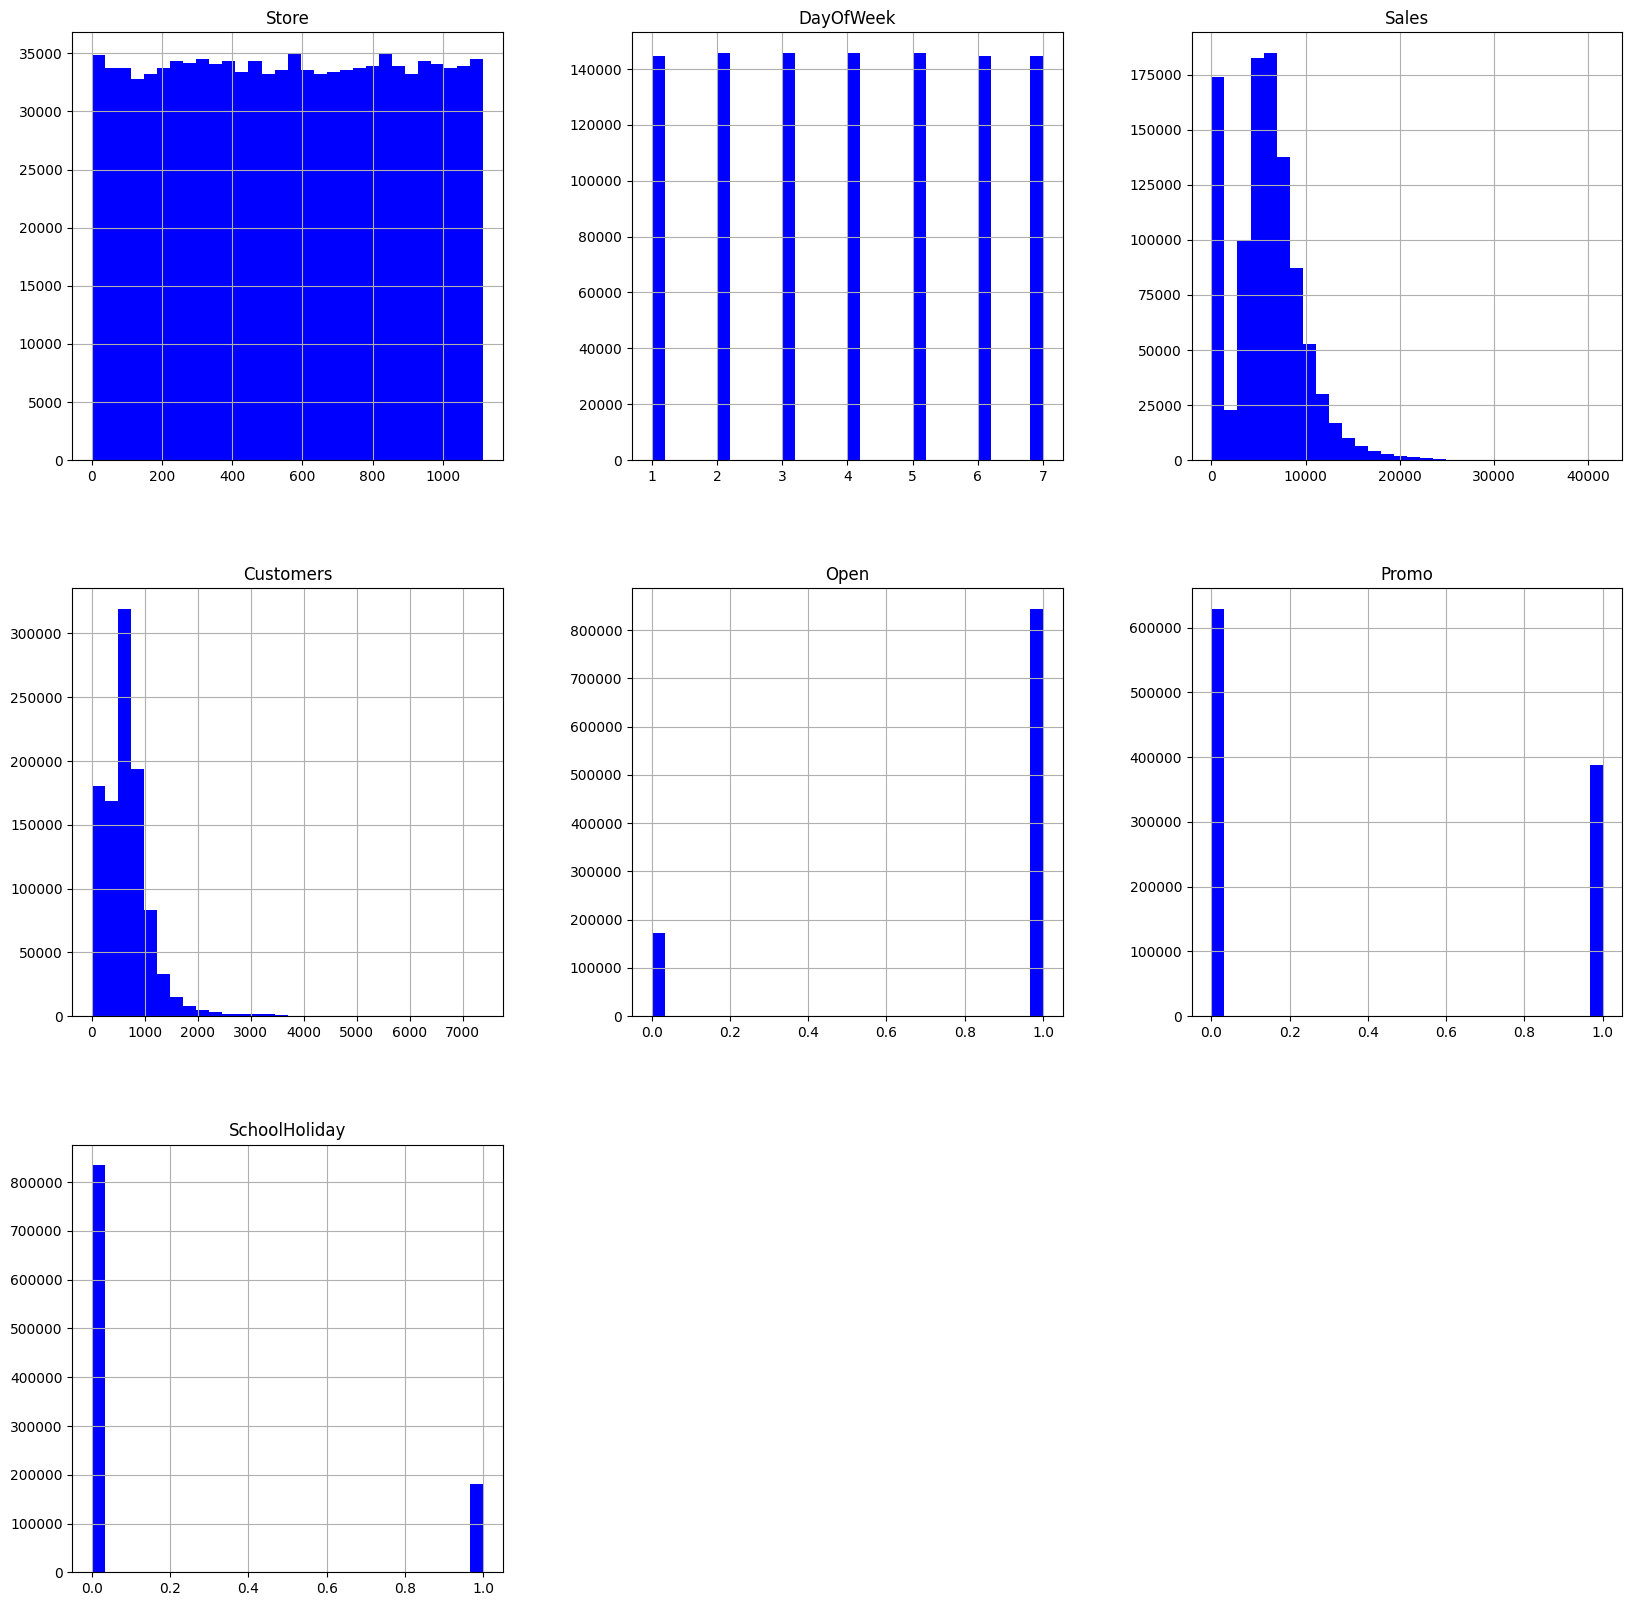

In [13]:
sales_train_df.hist(bins = 30, figsize = (20,20), color = 'b')

- Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
-  Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
- Stores are open ~80% of the time
-  Data is equally distributed among all stores (no bias)
- Promo #1 was running ~40% of the time
-  Average sales around 5000-6000 Euros
- School holidays are around ~18% of the time

In [14]:
sales_train_df['Customers'].max()

7388

In [15]:
# For seeing how many stores are open and closed!
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]


In [16]:
# Count the number of stores that are open and closed
print("Total =", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))


Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [17]:
# For keeping open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [18]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [19]:
# For droping the open column since it has no meaning now from above table
sales_train_df.drop(['Open'], axis=1, inplace=True)

<ipython-input-19-effc11b10fc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis=1, inplace=True)


In [20]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [21]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Average sales = 6955 Euros,	average number of customers = 762	(went up)

#3.2: **EXPLORE STORES INFORMATION DATA**

<Axes: >

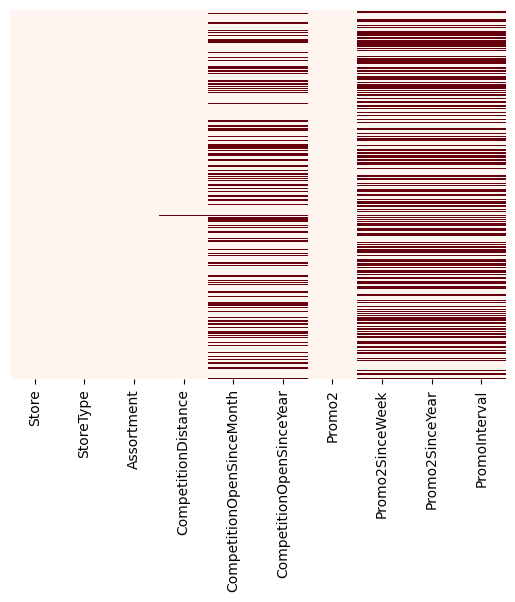

In [22]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [23]:
# For seiing the missing values in the 'CompetitionDistance'
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


N:B. Only 3 rows are missing

In [24]:
# For seeing the missing values in the 'CompetitionOpenSinceMonth'
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


N:B. Many rows are missing = 354 (almost one third of the 1115 stores)

In [25]:
# For seeing the stores that are not participating in promo2,
store_info_df[ store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


N:B. About **544 stores** are not participating in promo2.

It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
+  There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing

### # For setting all the colums with non value to zero

In [26]:
# Let's set these values to zeros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df [str].fillna(0, inplace = True)

<Axes: >

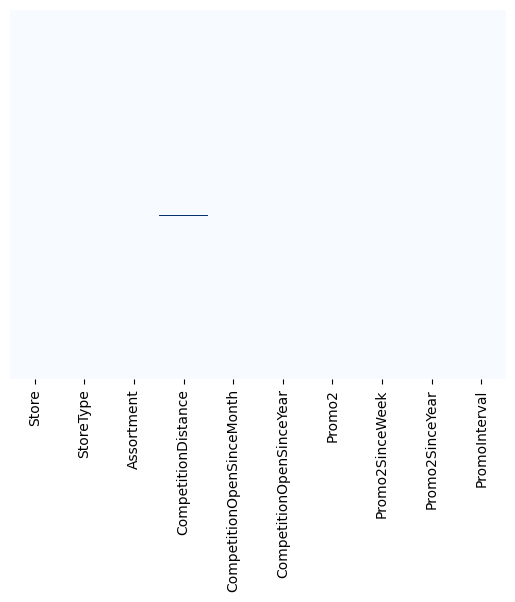

In [27]:
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [28]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

<Axes: >

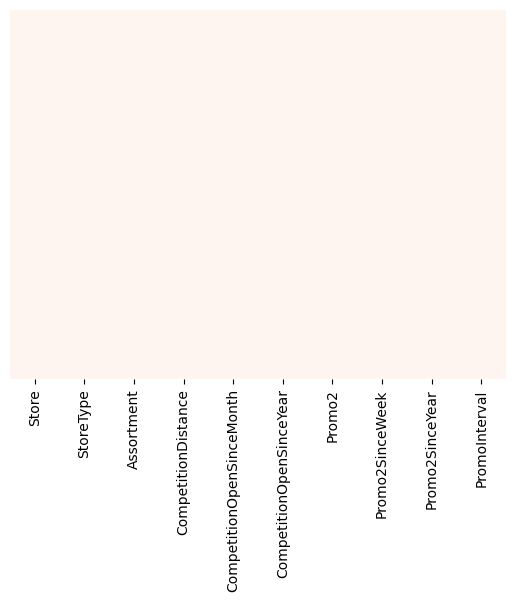

In [29]:
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

### For plotting histogram for store dataframe

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

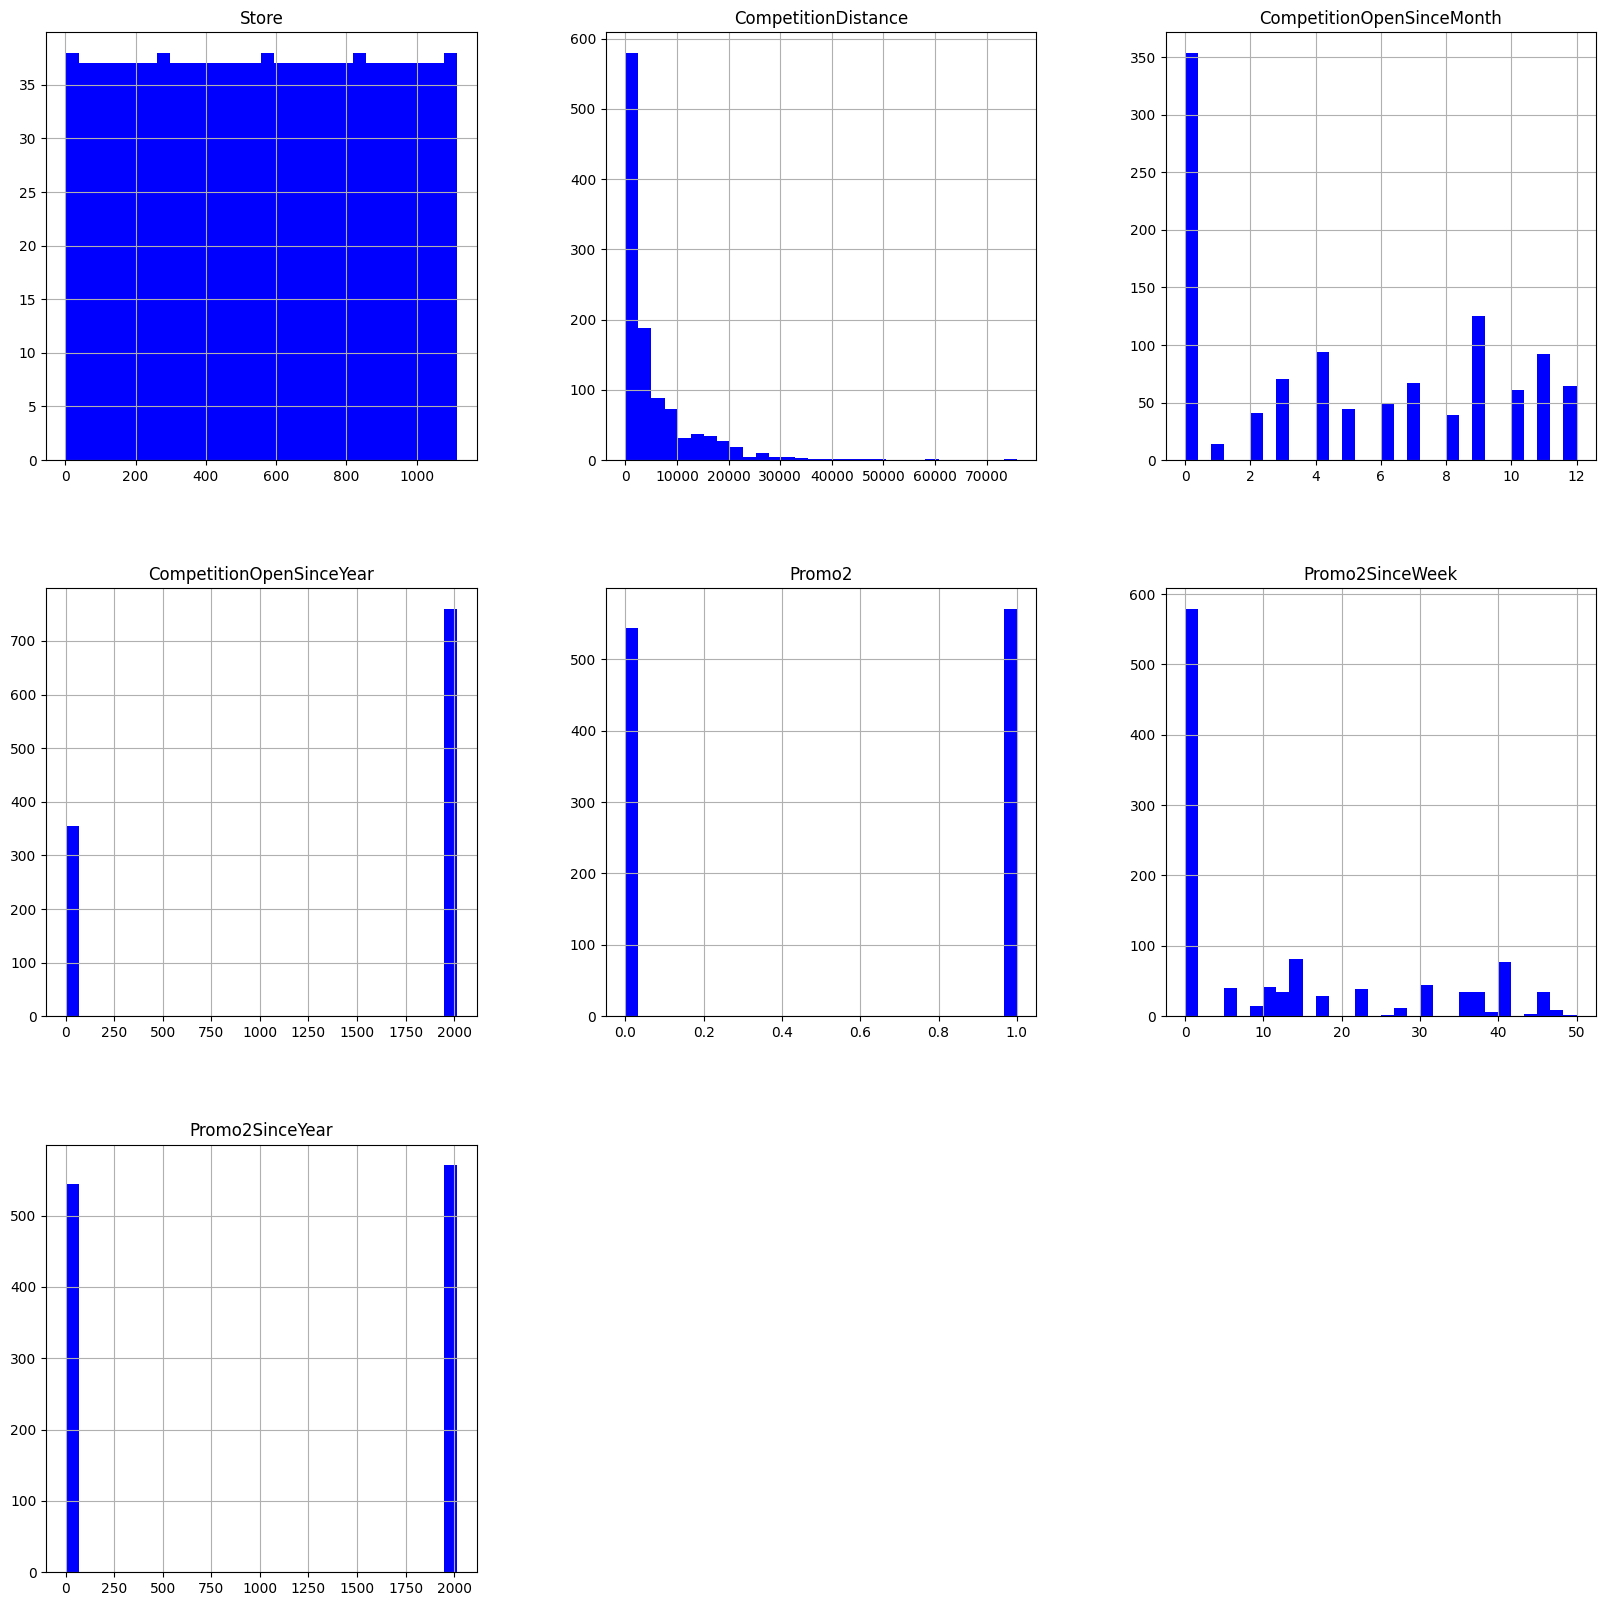

In [30]:
store_info_df.hist(bins = 30, figsize = (20,20), color = 'b')


+ Half of stores are involved in promo 2
+ Half of the stores have their competition at a distance of 0-3000m (3 kms away)

#3.3:  <ins>**EXPLORE MERGED DATASET**

### Type of merge to be performed.
* **left**: use only keys from left frame, similar to a SQL left outer join;
preserve key order.
* **right**: use only keys from right frame, similar to a SQL right outer join;
preserve key order.
* **outer**: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
+ **inner**: use intersection of keys from both frames, similar to a SQL inner.
+ **join**: preserve the order of the left keys.


on: label or list

## For merging both data frames together based on 'store'
+ Sale data
+ store date

In [31]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [32]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [33]:
sales_train_all_df.to_csv('test.csv', index=False)

### For getting correlations

In [34]:
correlations = sales_train_all_df.corr(numeric_only = [True])['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

+ customers and promo are positively correlated with the sales
+ Promo2 does not seem to be effective at all

### For virtualize the heatmap

<Axes: >

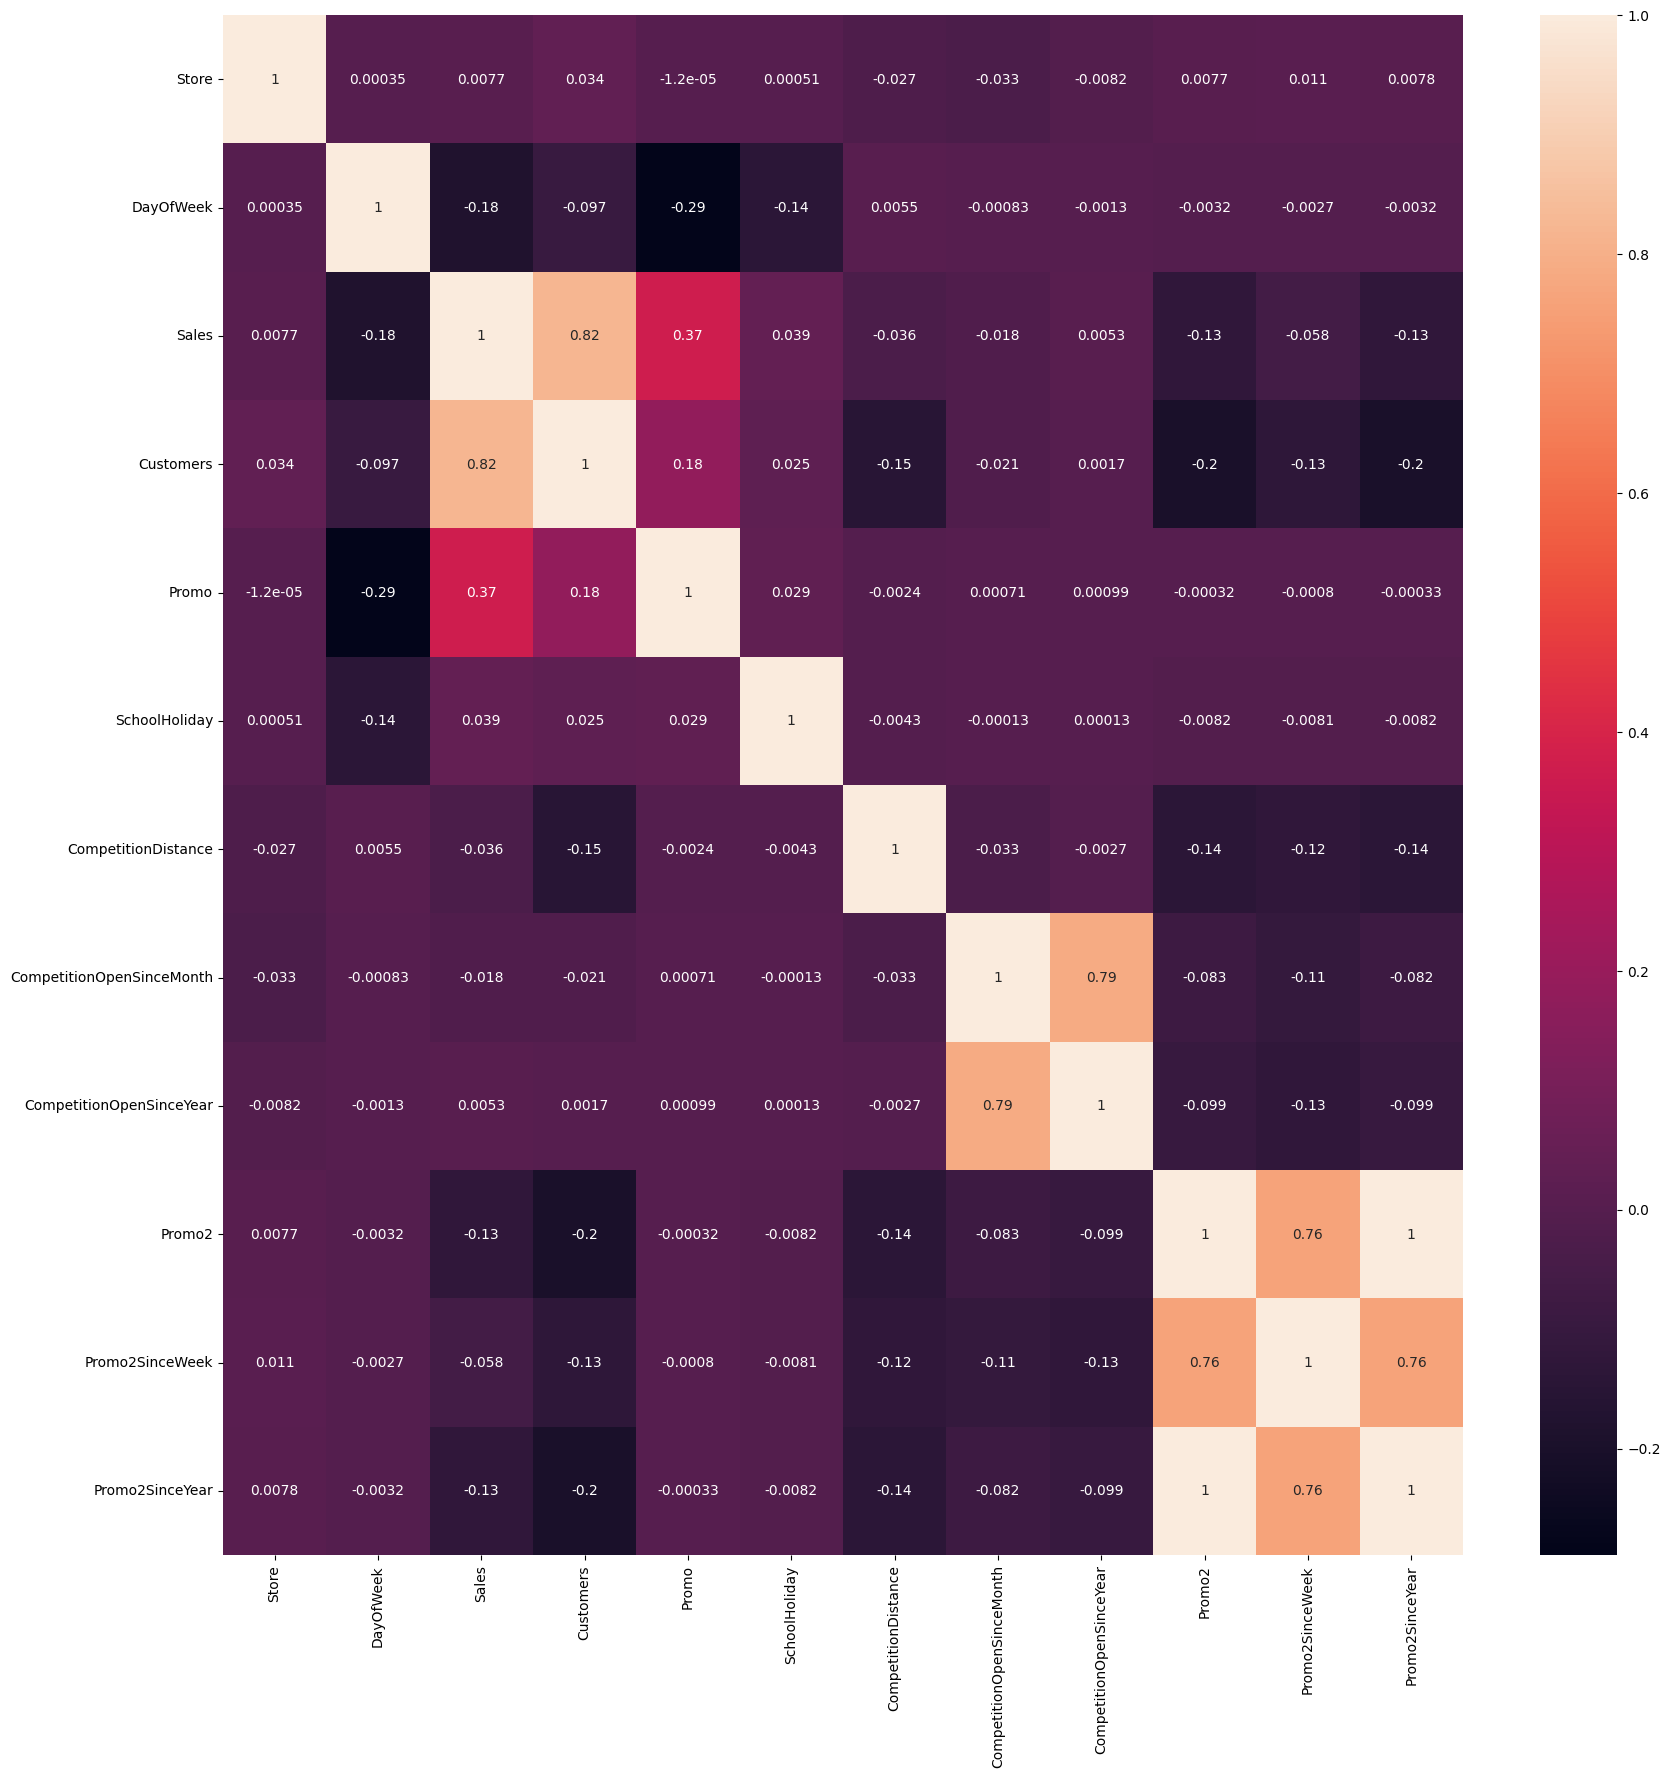

In [35]:
correlations = sales_train_all_df.corr(numeric_only = [True])
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Customers/Prmo2 and sales are strongly correlated

In [36]:
# For separating the year and put it into a separate column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [37]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [38]:
# For separating the Day and Month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day


In [39]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


### For checking the average sales and number of customers per month
+ **groupby** works great by grouping all the data that share the same month column, then obtain the mean of the sales column

Text(0.5, 1.0, 'Average Customers Per Month')

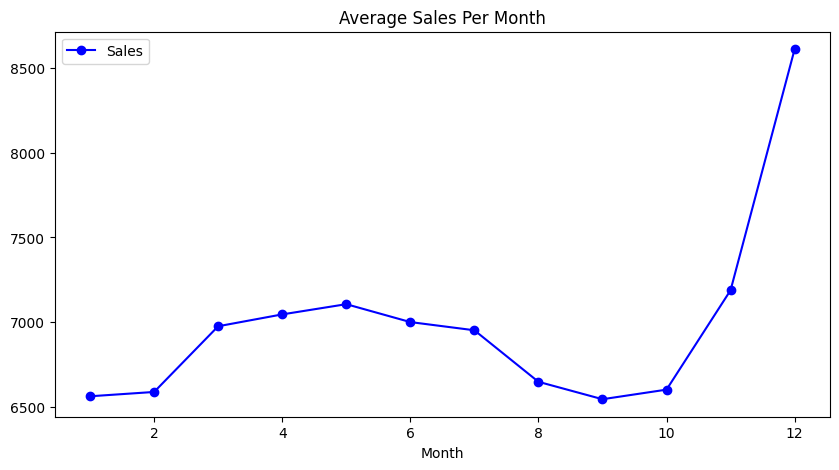

<Figure size 640x480 with 0 Axes>

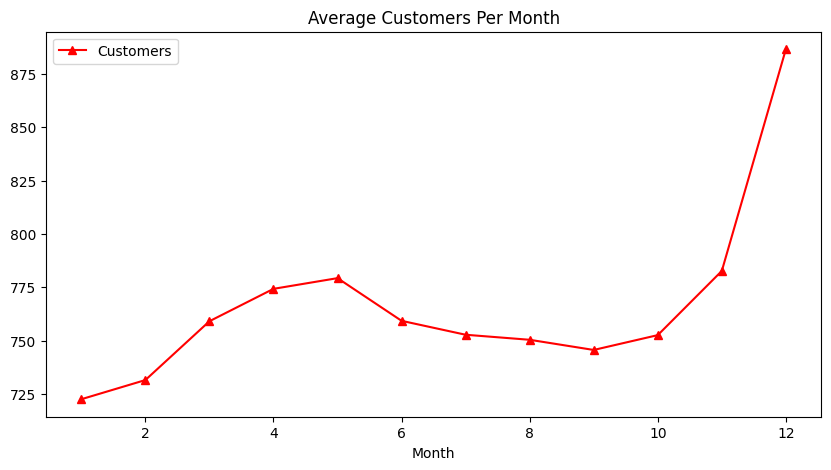

In [40]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Average Sales Per Month')


# For print average customers
plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'r')
axis.set_title('Average Customers Per Month')

It looks like sales and number of customers peak around christmas timeframe

Text(0.5, 1.0, 'Average Sales Per Day')

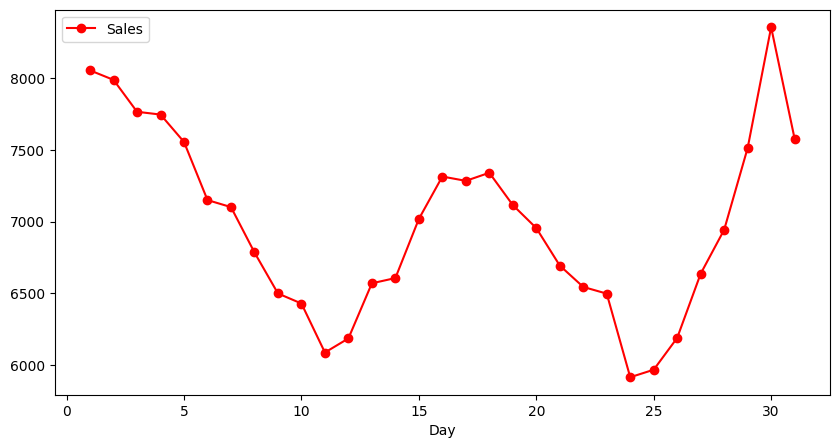

<Figure size 640x480 with 0 Axes>

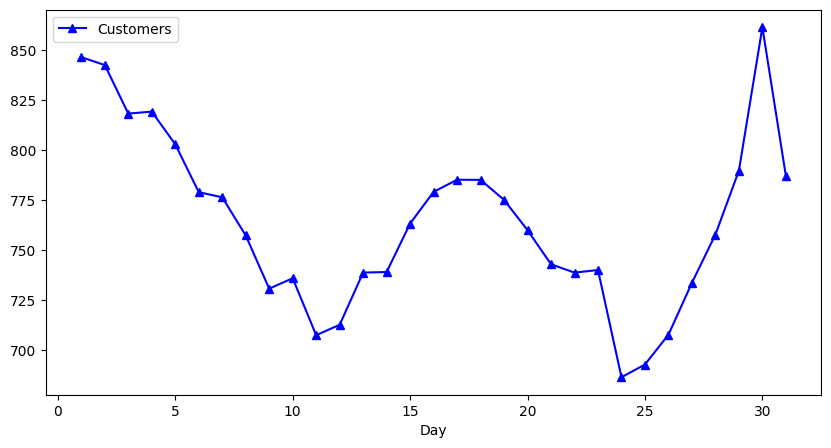

In [41]:
# For geeting the sales and customers per day of the month
ax = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')


plt.figure()
ax = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

 + Minimum number of customers are generally around the 24th of the month
 + Most customers and sales are around 30th and 1st of the month

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

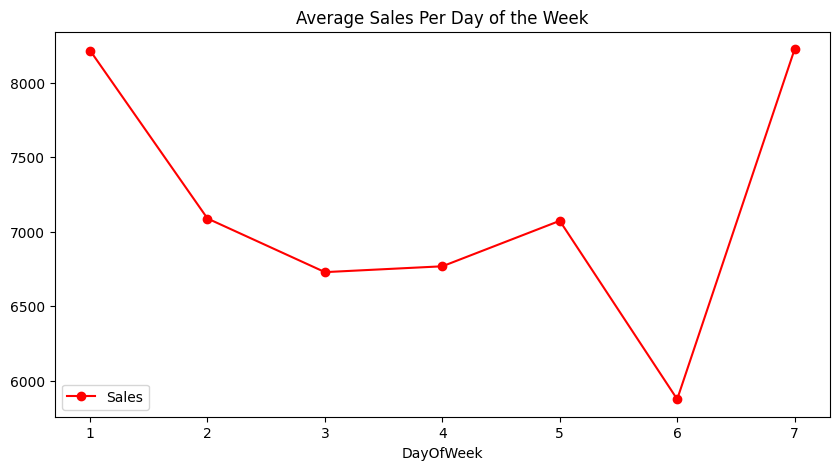

<Figure size 640x480 with 0 Axes>

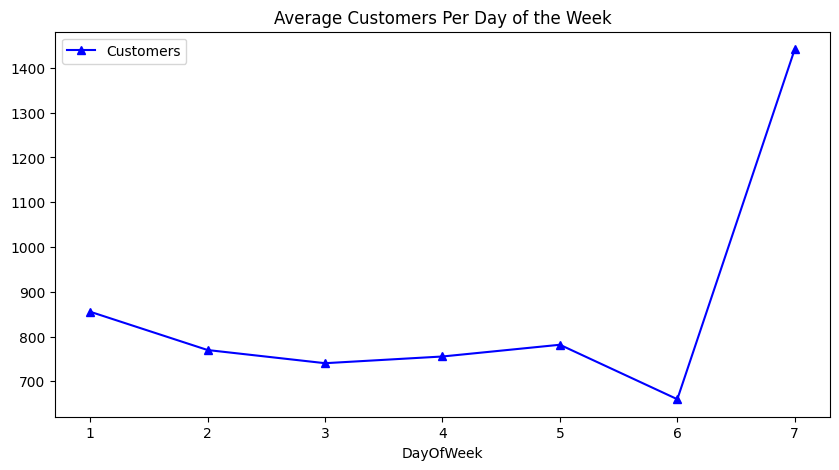

In [42]:
# For getting the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

So the actual peak of the sales happen around Sunday timeframe, which means throughout the entire like 52 weeks that we have in the year, the maximum or the best day is sunday

<Axes: xlabel='Date'>

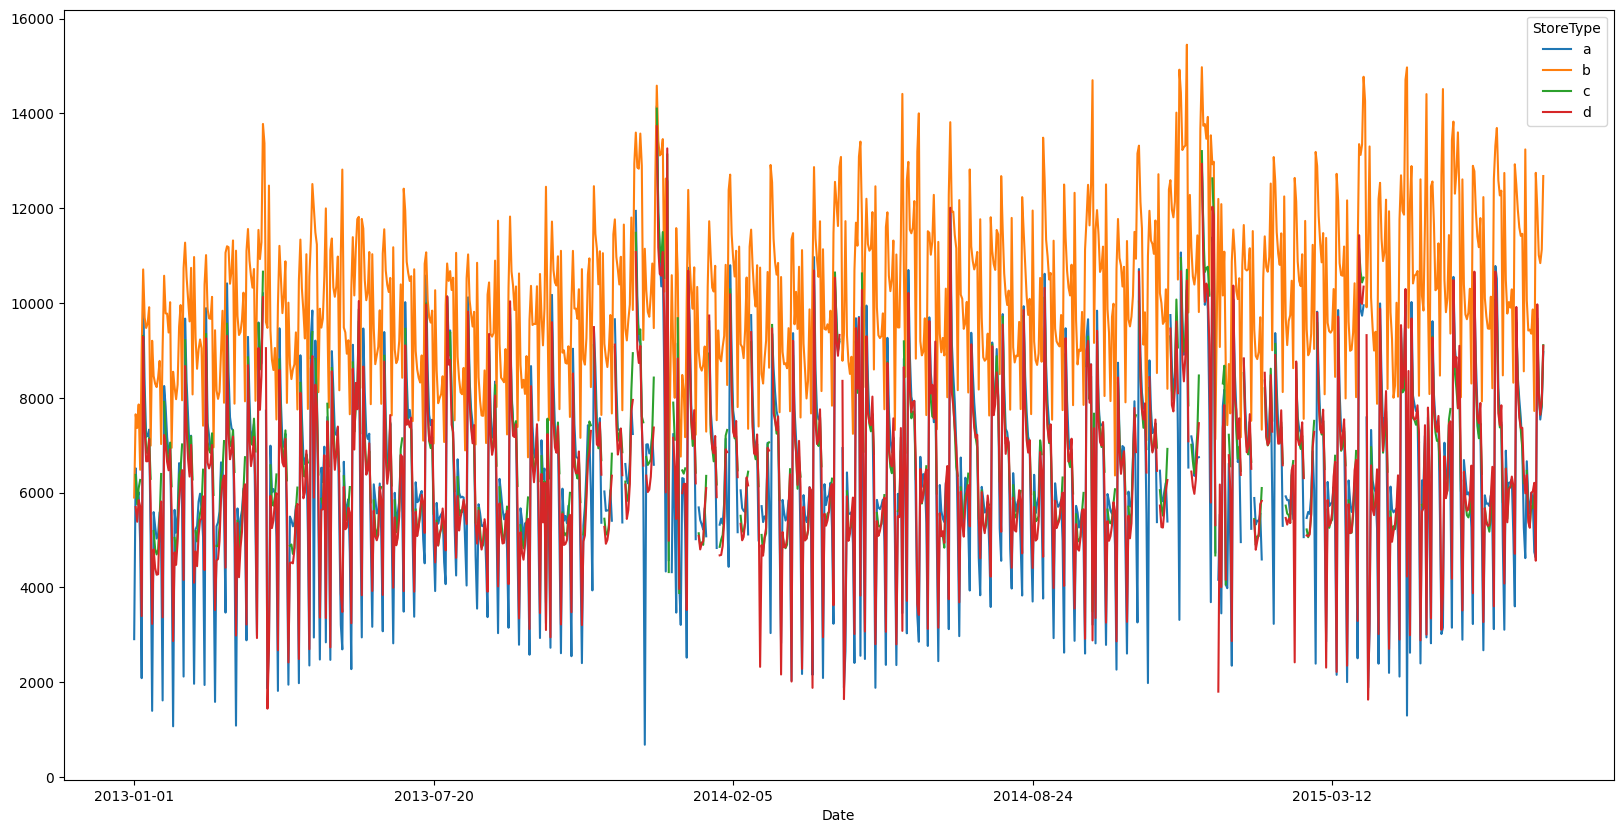

In [43]:
# For plotting date and store type and to see which store type has the highest number of sales and highest number of of dollars
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax=ax)

It seems that store **B** that is the orange one, which is B, has the highest value of sales of the average sales.

<Axes: xlabel='Promo', ylabel='Customers'>

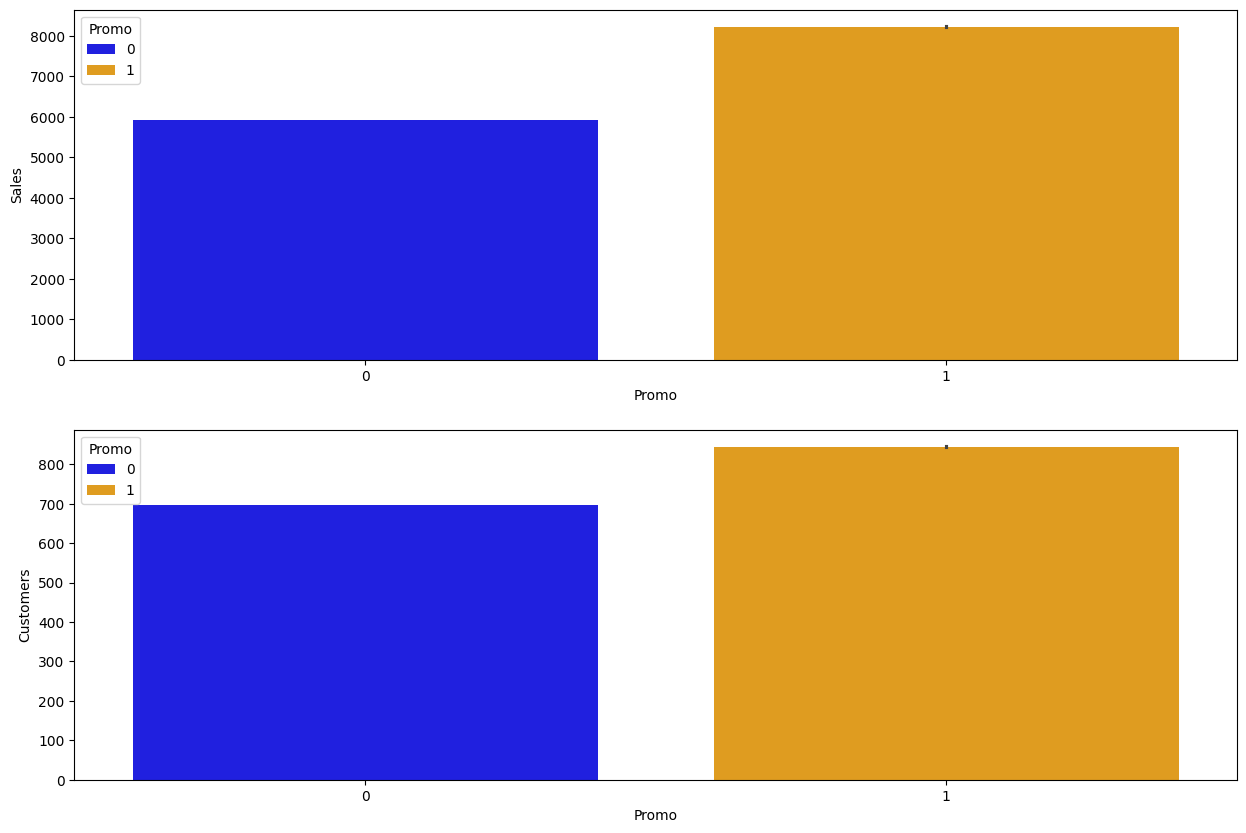

In [44]:
# bar plot
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', hue = 'Promo', data = sales_train_all_df, palette =['blue','orange'])

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', hue = 'Promo', data = sales_train_all_df, palette =['blue','orange'])

<Axes: xlabel='Promo', ylabel='Customers'>

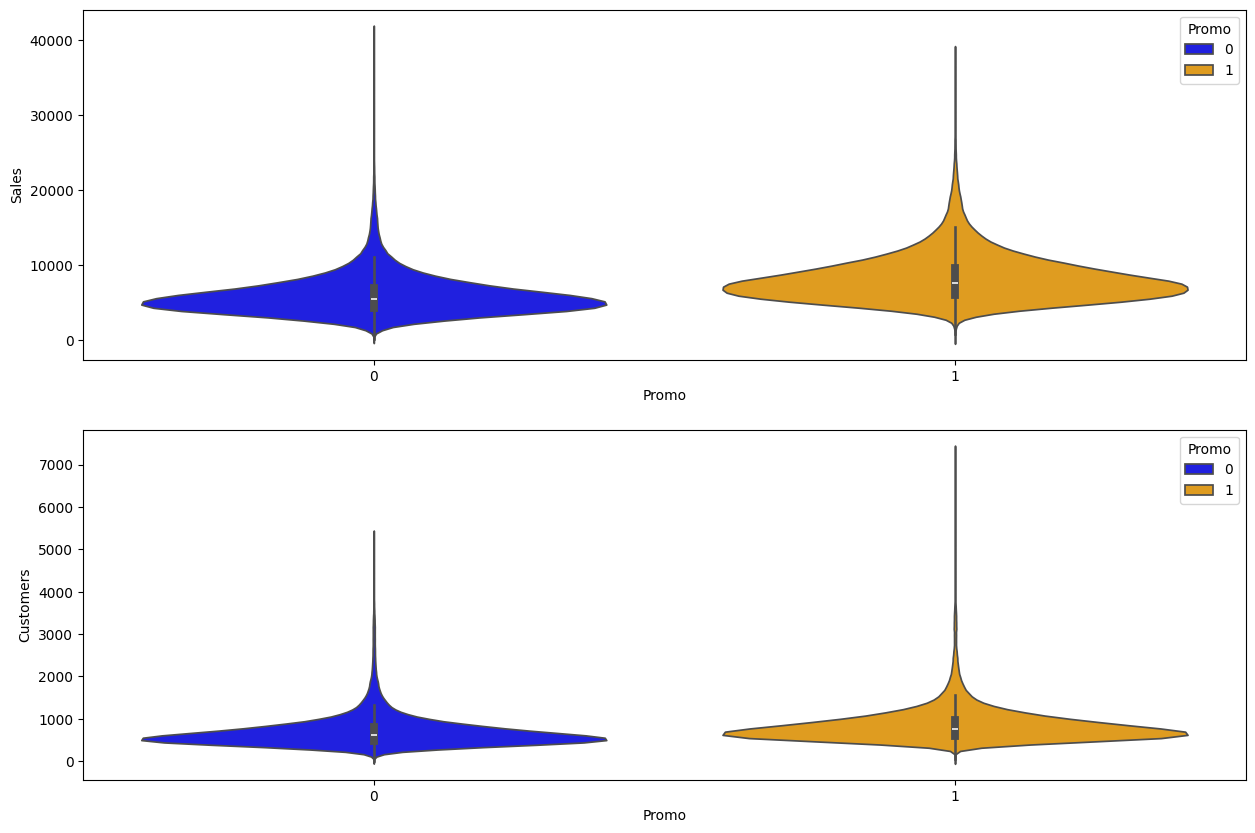

In [45]:
# Violinplot
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', hue = 'Promo', data = sales_train_all_df, palette =['blue','orange'])

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', hue = 'Promo', data = sales_train_all_df, palette =['blue','orange'])

#  <ins>**UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET**

## <ins>**FACEBOOK PROPHET**
+ Prophet is open source software released by Facebook's Core Data Science team.
+ Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
+ Prophet works best with time series that have strong seasonal effects and several seasons of historical data.
+ For more information, please check this out:
    + https://research.fb.com/prophet-forecasting-at-scale/
    + https://facebook.github.io/prophet/docs/quickstart.html#python-api
  
### <ins>**ACCURATE AND FAST**
+ Facebook teams uses Prophet for accurate forecasting and planning.
+ Prophet can generate results in seconds.

### <ins>**AUTOMATIC**
+ No need to perform data preprocessing.
+ Prophet works with missing data with several outliers.

### <ins>**DOMAIN KNOWLEDGE INTEGRATION**
+ Users can tweak forecast by manually adding domain
specific knowledge.

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

# <ins>**TRAIN THE MODEL PART A**

## <ins>**import prophet**

In [46]:
pip install prophet

In [47]:
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

+ The function below takes in the data frame, storeID, and number of future period forecast
  + The function then generates date/sales columns in Prophet format
  + The function then makes time series predictions

In [48]:
def sales_prediction(Store_ID, sales_df, periods):
  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

# for building future
  model    = Prophet(daily_seasonality=True)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods) # for specify the tie period
  forecast = model.predict(future) # for forcasting
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast) # For ploting model and forcast

  return sales_df

DEBUG:cmdstanpy:input tempfile: /tmp/tmp69lnmyp7/fa5qwp8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp69lnmyp7/_ggj5vks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19347', 'data', 'file=/tmp/tmp69lnmyp7/fa5qwp8m.json', 'init=/tmp/tmp69lnmyp7/_ggj5vks.json', 'output', 'file=/tmp/tmp69lnmyp7/prophet_model4g7bvfw1/prophet_model-20240409113329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


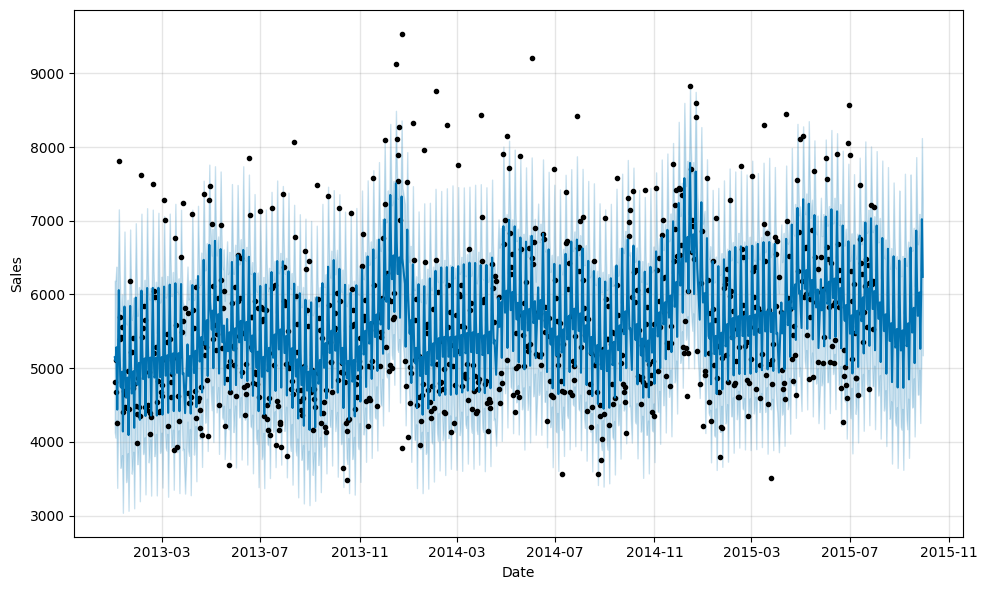

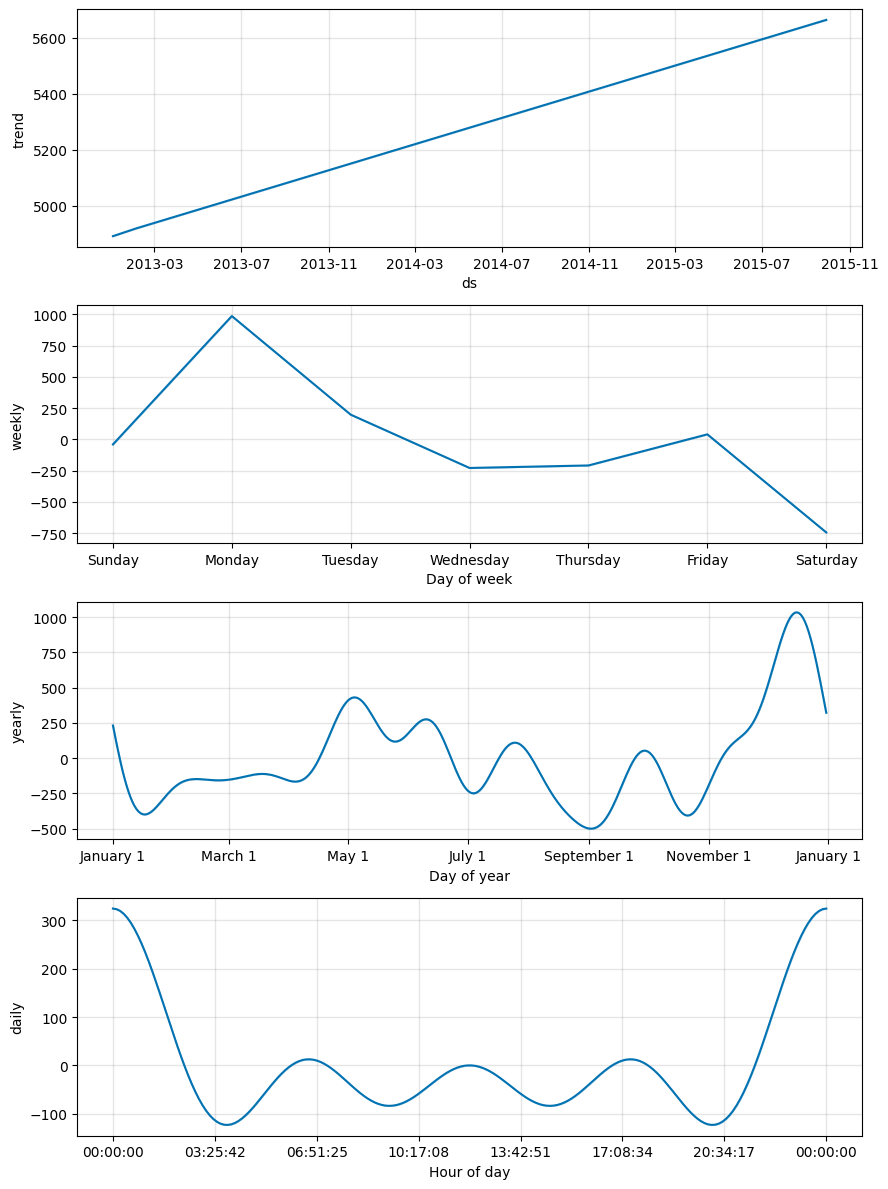

In [49]:
sales_prediction(10, sales_train_all_df, 60)

#  <ins>**TRAIN THE MODEL PART B**


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [50]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [51]:
# For getting all the dates pertaining to school holidays
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [52]:
school_holidays.shape

(163457,)

In [53]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [54]:
# For getting all the dates pertaining to state holidays
state_holidays = sales_train_all_df [ (sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [55]:
state_holidays

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [56]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [57]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [58]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [59]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


## **For concatenating both school and state holidays**


In [60]:
# concatenate both school and state holidays
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [61]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp69lnmyp7/7j9ybesb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp69lnmyp7/nalf5syf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37181', 'data', 'file=/tmp/tmp69lnmyp7/7j9ybesb.json', 'init=/tmp/tmp69lnmyp7/nalf5syf.json', 'output', 'file=/tmp/tmp69lnmyp7/prophet_modelpy5yps72/prophet_model-20240409113411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:34:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


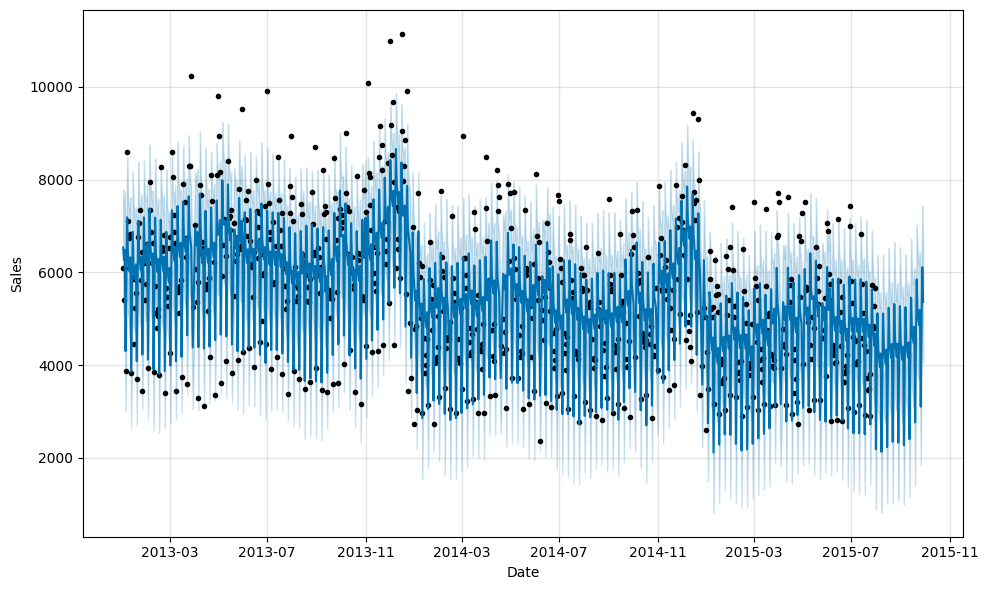

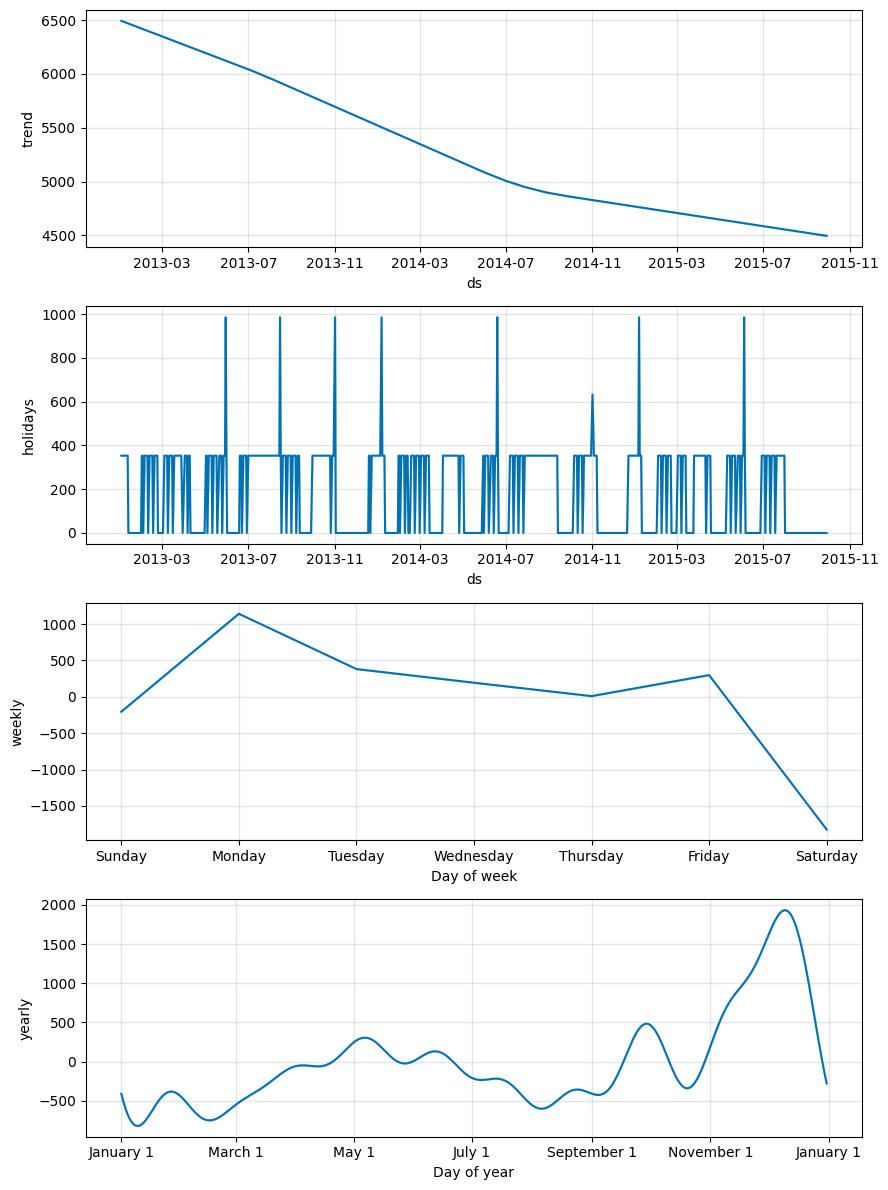

In [62]:
# For making predictions using holidays for a specific store
sales_prediction(6, sales_train_all_df, school_state_holidays, 60)